## **Capstone MDS - EDA Turnos Malos**

#### **_Integrantes:_**  

1. Evans Díaz   
1. Felipe Ojeda
1. Javier Cofre  
1. Luis Reinoso

In [1]:
# importar librerías
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import StandardScaler, OneHotEncoder,\
                                  LabelEncoder, MinMaxScaler
from sklearn.ensemble import IsolationForest
from matplotlib.ticker import EngFormatter

## **_1. Lectura (carga) de los Datos_**

In [2]:
# importamos archivo
df = pd.read_csv('../Data/df_final_pay.csv', header=0)

In [3]:
# miramos el dataframe
df.head()

,year_2023,year_2024,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,CAT 798-AC,KOM-CHQ,KOM.960E5,Kom.930E-4,Kom.930E-4SE,Kom.930EN,Kom.930ER,Kom.930ER-MT,Kom.980E5,Komatsu AHS
0,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0
1,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,396.0,96.0,240.0,0.0,132.0,24.0
2,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,394.0,96.0,240.0,0.0,132.0,24.0
3,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,95.0,396.0,96.0,240.0,0.0,132.0,24.0
4,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0


In [4]:
# miramos los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year_2023            1567 non-null   bool   
 1   year_2024            1567 non-null   bool   
 2   month_2              1567 non-null   bool   
 3   month_3              1567 non-null   bool   
 4   month_4              1567 non-null   bool   
 5   month_5              1567 non-null   bool   
 6   month_6              1567 non-null   bool   
 7   month_7              1567 non-null   bool   
 8   month_8              1567 non-null   bool   
 9   month_9              1567 non-null   bool   
 10  month_10             1567 non-null   bool   
 11  month_11             1567 non-null   bool   
 12  month_12             1567 non-null   bool   
 13  day_2                1567 non-null   bool   
 14  day_3                1567 non-null   bool   
 15  day_4                1567 non-null   b

In [5]:
# miramos el tiempo efectivo
df['efectivo'].describe()

count    1.567000e+03
mean     2.909883e+06
std      1.845828e+05
min      1.280659e+06
25%      2.807124e+06
50%      2.922574e+06
75%      3.031966e+06
max      3.453483e+06
Name: efectivo, dtype: float64

## **_2 Preparación del DataFrame_**

### _2.1 Transformamos las booleanas categóricas a números_

In [6]:
# transformamos las variables bool a categorical y le asignamos 0 o 1
for col in df.columns:
  if df[col].dtype == 'bool':
     df[col] = df[col].astype('category').cat.codes
     df[col] = df[col].astype('category') # para que quede como category y no como int8

In [7]:
df.head()   

,year_2023,year_2024,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,CAT 798-AC,KOM-CHQ,KOM.960E5,Kom.930E-4,Kom.930E-4SE,Kom.930EN,Kom.930ER,Kom.930ER-MT,Kom.980E5,Komatsu AHS
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,24.0,96.0,396.0,96.0,240.0,0.0,132.0,24.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,24.0,96.0,394.0,96.0,240.0,0.0,132.0,24.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,24.0,95.0,396.0,96.0,240.0,0.0,132.0,24.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0


### _2.2 Separamos los datos por debajo la media y por encima de la media_

In [8]:
# calculamos la media de payload 
media_payload = df['payload'].mean()

In [9]:
# dataframe con datos bajo la media
df_bajo_media = df[df['payload'] < media_payload]

# dataframe con datos sobre la media 
df_sobre_media = df[df['payload'] >= media_payload] 

### _2.3 Escalamos los datos_

In [10]:
# escala de los datos
scaler = StandardScaler()
scaler_bm = scaler.fit_transform(df_bajo_media)
scaler_sm = scaler.fit_transform(df_sobre_media)

In [11]:
# regeneramos el dataframe
scaler_bm = pd.DataFrame(scaler_bm, columns=df_bajo_media.columns)  
scaler_bm

,year_2023,year_2024,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,CAT 798-AC,KOM-CHQ,KOM.960E5,Kom.930E-4,Kom.930E-4SE,Kom.930EN,Kom.930ER,Kom.930ER-MT,Kom.980E5,Komatsu AHS
0,-1.534164,-0.402457,-0.367152,-0.272431,-0.277531,-0.272431,-0.292449,-0.306862,-0.269855,-0.259365,...,-0.297836,-0.785751,5.880354,-1.565585,-0.005411,5.553364,0.098149,-0.049296,-6.057897,0.43446
1,-1.534164,-0.402457,-0.367152,-0.272431,-0.277531,-0.272431,-0.292449,-0.306862,-0.269855,-0.259365,...,-0.297836,-0.785751,5.880354,0.186936,-0.051433,5.553364,0.098149,-0.049296,-6.057897,0.43446
2,-1.534164,-0.402457,-0.367152,-0.272431,-0.277531,-0.272431,-0.292449,-0.306862,-0.269855,-0.259365,...,-0.297836,-0.785751,5.880354,0.186936,0.132655,5.553364,0.098149,-0.049296,-6.057897,0.43446
3,-1.534164,-0.402457,-0.367152,-0.272431,-0.277531,-0.272431,-0.292449,-0.306862,-0.269855,-0.259365,...,-0.297836,-0.785751,5.880354,-1.565585,0.040611,5.553364,-0.582296,-0.049296,-6.057897,0.43446
4,-1.534164,-0.402457,-0.367152,-0.272431,-0.277531,-0.272431,-0.292449,-0.306862,-0.269855,-0.259365,...,-0.297836,-0.785751,5.880354,0.186936,0.040611,5.553364,0.098149,-0.049296,-6.057897,0.43446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,-1.534164,2.484736,2.723668,-0.272431,-0.277531,-0.272431,-0.292449,-0.306862,-0.269855,-0.259365,...,3.594677,-0.785751,-0.234720,0.186936,0.684917,-0.200062,0.098149,-0.049296,0.188659,-0.67010
821,-1.534164,2.484736,2.723668,-0.272431,-0.277531,-0.272431,-0.292449,-0.306862,-0.269855,-0.259365,...,3.594677,-0.785751,-0.234720,0.186936,0.638896,-1.638419,-8.067194,-0.049296,0.188659,-0.67010
822,-1.534164,2.484736,2.723668,-0.272431,-0.277531,-0.272431,-0.292449,-0.306862,-0.269855,-0.259365,...,3.594677,-0.785751,-0.234720,0.186936,0.684917,-1.638419,-8.067194,-0.049296,0.188659,-0.67010
823,-1.534164,2.484736,2.723668,-0.272431,-0.277531,-0.272431,-0.292449,-0.306862,-0.269855,-0.259365,...,3.594677,-0.785751,-0.234720,0.186936,0.684917,-1.638419,-8.067194,-0.049296,0.188659,-0.67010


In [12]:
# regeneramos el dataframe
scaler_sm = pd.DataFrame(scaler_sm, columns=df_sobre_media.columns)
scaler_sm

,year_2023,year_2024,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,CAT 798-AC,KOM-CHQ,KOM.960E5,Kom.930E-4,Kom.930E-4SE,Kom.930EN,Kom.930ER,Kom.930ER-MT,Kom.980E5,Komatsu AHS
0,-0.499158,-0.082367,-0.325288,-0.312463,-0.291196,-0.315054,-0.27735,-0.27735,-0.317632,-0.317632,...,-0.036736,-0.335326,1.914482,0.201821,1.446678,1.506526,0.122311,0.0,-2.105665,-0.954050
1,-0.499158,-0.082367,-0.325288,-0.312463,-0.291196,-0.315054,-0.27735,-0.27735,-0.317632,-0.317632,...,-0.036736,-0.335326,1.914482,0.201821,1.503779,1.506526,0.122311,0.0,-2.105665,-0.954050
2,-0.499158,-0.082367,-0.325288,-0.312463,-0.291196,-0.315054,-0.27735,-0.27735,-0.317632,-0.317632,...,-0.036736,-0.335326,1.914482,0.201821,1.389578,1.506526,0.122311,0.0,-2.105665,-0.954050
3,-0.499158,-0.082367,-0.325288,-0.312463,-0.291196,-0.315054,-0.27735,-0.27735,-0.317632,-0.317632,...,-0.036736,-0.335326,1.914482,-2.067133,1.503779,1.506526,0.122311,0.0,-2.105665,-0.954050
4,-0.499158,-0.082367,-0.325288,-0.312463,-0.291196,-0.315054,-0.27735,-0.27735,-0.317632,-0.317632,...,-0.036736,-0.335326,1.914482,0.201821,1.446678,1.506526,0.122311,0.0,-2.105665,-0.954050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,-0.499158,12.140840,-0.325288,-0.312463,-0.291196,-0.315054,-0.27735,-0.27735,-0.317632,-0.317632,...,-0.036736,-0.335326,-0.769380,0.201821,2.188987,-0.749747,0.122311,0.0,0.481096,-2.439166
738,-0.499158,12.140840,-0.325288,-0.312463,-0.291196,-0.315054,-0.27735,-0.27735,-0.317632,-0.317632,...,-0.036736,-0.335326,-0.769380,0.201821,2.188987,-0.749747,0.122311,0.0,0.481096,-2.439166
739,-0.499158,12.140840,-0.325288,-0.312463,-0.291196,-0.315054,-0.27735,-0.27735,-0.317632,-0.317632,...,-0.036736,-0.335326,-0.769380,0.201821,2.188987,-0.749747,0.122311,0.0,0.481096,-2.439166
740,-0.499158,12.140840,-0.325288,-0.312463,-0.291196,-0.315054,-0.27735,-0.27735,-0.317632,-0.317632,...,-0.036736,-0.335326,-0.769380,0.201821,2.188987,-0.749747,0.122311,0.0,0.481096,-2.439166


In [17]:
scaler_bm_sin_payload = scaler_bm.drop(columns=['payload']).copy()

In [18]:
scaler_bm_sin_payload.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 84 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year_2023            825 non-null    float64
 1   year_2024            825 non-null    float64
 2   month_2              825 non-null    float64
 3   month_3              825 non-null    float64
 4   month_4              825 non-null    float64
 5   month_5              825 non-null    float64
 6   month_6              825 non-null    float64
 7   month_7              825 non-null    float64
 8   month_8              825 non-null    float64
 9   month_9              825 non-null    float64
 10  month_10             825 non-null    float64
 11  month_11             825 non-null    float64
 12  month_12             825 non-null    float64
 13  day_2                825 non-null    float64
 14  day_3                825 non-null    float64
 15  day_4                825 non-null    flo

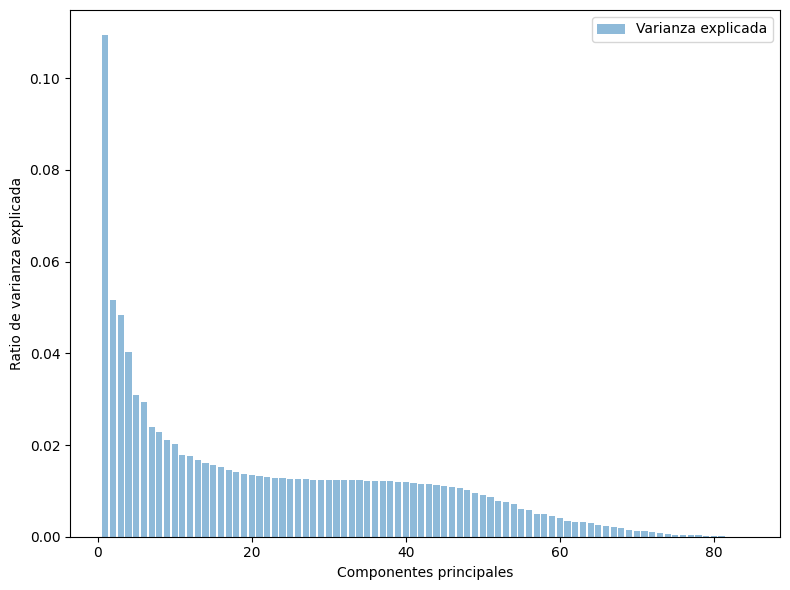

       year_2023     year_2024       month_2       month_3       month_4  \
0   1.463194e-01  4.477919e-02 -4.574259e-02 -8.452905e-02  1.777843e-02   
1  -2.349410e-01  1.334039e-01  9.011163e-02 -1.563970e-01 -9.248097e-02   
2   2.180802e-01 -2.272042e-01 -1.757135e-01 -2.824222e-02  1.456894e-01   
3   1.647009e-01 -2.822420e-01 -1.198710e-01  1.750304e-01  4.101452e-02   
4  -2.414111e-02 -2.045233e-01 -2.974678e-01 -1.721959e-01 -1.037356e-01   
..           ...           ...           ...           ...           ...   
79  6.950501e-02  1.035467e-01 -4.032577e-03 -5.685019e-03  1.212839e-02   
80 -1.449242e-01 -2.174218e-01 -3.366959e-02 -7.751166e-03 -6.035275e-02   
81  3.497222e-01  5.220633e-01  2.171562e-02  1.991114e-02  1.813966e-01   
82  2.325245e-03  2.919328e-03 -1.774023e-03 -1.771047e-03 -6.364715e-04   
83 -8.848145e-16 -1.197698e-15 -2.623242e-16 -1.034957e-16 -4.732950e-16   

         month_5       month_6       month_7       month_8       month_9  ...  \
0   9.

In [21]:
# Aplicación de PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaler_bm_sin_payload)

# Varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Visualización de la varianza explicada por cada componente
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza explicada')
plt.ylabel('Ratio de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend()
plt.tight_layout()
plt.show()

# Contribución de cada variable a los componentes
components_df = pd.DataFrame(pca.components_, columns=scaler_bm_sin_payload.columns)
print(components_df)

In [22]:
explained_variance_ratio

array([1.09397510e-01, 5.16081514e-02, 4.83198113e-02, 4.01783583e-02,
       3.09259039e-02, 2.94801877e-02, 2.40182085e-02, 2.28991447e-02,
       2.11667239e-02, 2.02158256e-02, 1.77900674e-02, 1.75564255e-02,
       1.67682063e-02, 1.60017742e-02, 1.55653527e-02, 1.52564637e-02,
       1.45417218e-02, 1.40825758e-02, 1.37729429e-02, 1.34844036e-02,
       1.32070581e-02, 1.30789563e-02, 1.28581870e-02, 1.27006196e-02,
       1.26417080e-02, 1.25878572e-02, 1.25016448e-02, 1.24372442e-02,
       1.24183313e-02, 1.23845400e-02, 1.23516111e-02, 1.23356210e-02,
       1.23094826e-02, 1.22965246e-02, 1.22576572e-02, 1.21775399e-02,
       1.20685447e-02, 1.20442537e-02, 1.19770861e-02, 1.18908105e-02,
       1.17609214e-02, 1.15688409e-02, 1.14205436e-02, 1.13871509e-02,
       1.11190700e-02, 1.08865386e-02, 1.05856825e-02, 1.01833323e-02,
       9.47684244e-03, 9.01575534e-03, 8.61202845e-03, 7.74022508e-03,
       7.56333824e-03, 7.21597783e-03, 6.00182412e-03, 5.81087115e-03,
      

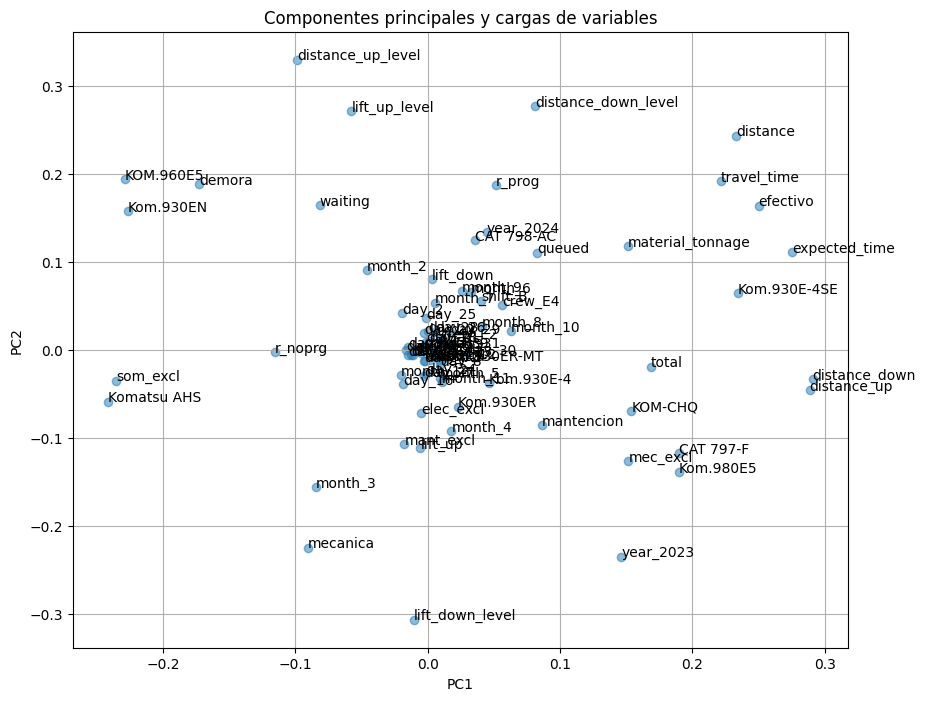

In [28]:
# Gráfico de componentes principales y cargas de variables
plt.figure(figsize=(10, 8))
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.5)
for i, txt in enumerate(scaler_bm_sin_payload.columns):
    plt.annotate(txt, (pca.components_[0, i], pca.components_[1, i]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Componentes principales y cargas de variables')
plt.grid()
plt.show()


## **_3 Proceso de Clustering_**

### _3.1 Calculamos el número óptimo de clusters_

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

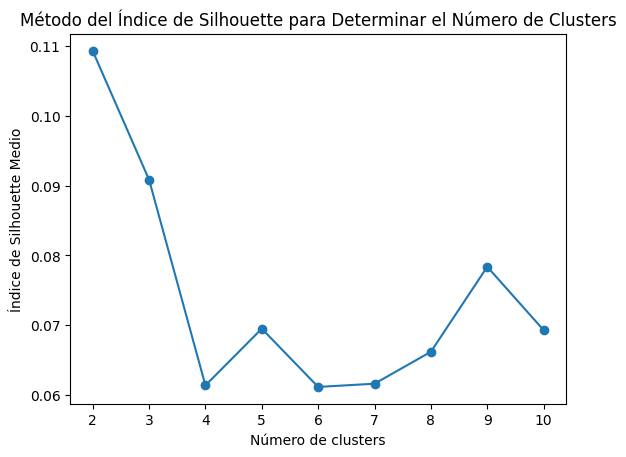

In [35]:
range_n_clusters = list(range(2, 11))
silhouette_avg = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(scaler_bm)
    silhouette_avg.append(silhouette_score(scaler_bm, cluster_labels))

# Plotear la media del índice de Silhouette
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Índice de Silhouette Medio')
plt.title('Método del Índice de Silhouette para Determinar el Número de Clusters')
plt.show()


### _3.2 Aplicamos el algoritmo KMeans_

In [42]:
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaler_bm)

df_bajo_media['cluster'] = kmeans.predict(scaler_bm)

/var/folders/m_/q3n8nryd24xfcpjsmy_8pw8c0000gn/T/ipykernel_4321/3818731780.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bajo_media['cluster'] = kmeans.predict(scaler_bm)


In [43]:
df_bajo_media['cluster'].value_counts()

cluster
1    569
0    223
2     33
Name: count, dtype: int64

In [44]:
for cluster_id in df_bajo_media['cluster'].unique():
    print(f"Cluster {cluster_id}:\n", df_bajo_media[df_bajo_media['cluster'] == cluster_id].describe())


Cluster 2:
               total      efectivo     mantencion       mecanica  \
count  3.300000e+01  3.300000e+01      33.000000      33.000000   
mean   4.359984e+06  2.480538e+06  147489.606061  516861.606061   
std    1.076714e+05  3.333032e+05   68070.118118  164361.913849   
min    4.035600e+06  1.280659e+06       0.000000  248235.000000   
25%    4.276800e+06  2.414864e+06   98017.000000  390821.000000   
50%    4.359600e+06  2.600286e+06  146761.000000  482858.000000   
75%    4.442400e+06  2.668109e+06  188136.000000  640049.000000   
max    4.518000e+06  2.902584e+06  277844.000000  863296.000000   

           electrica      mant_excl       mec_excl     elec_excl  \
count      33.000000      33.000000      33.000000     33.000000   
mean    36055.909091   39288.121212   88968.181818   6401.000000   
std     33904.208777   34514.617260   42335.547790  10830.604583   
min         0.000000       0.000000    6167.000000      0.000000   
25%      8310.000000    7096.000000   66601.

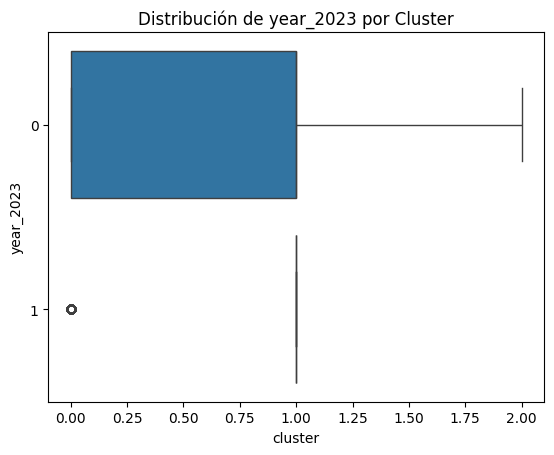

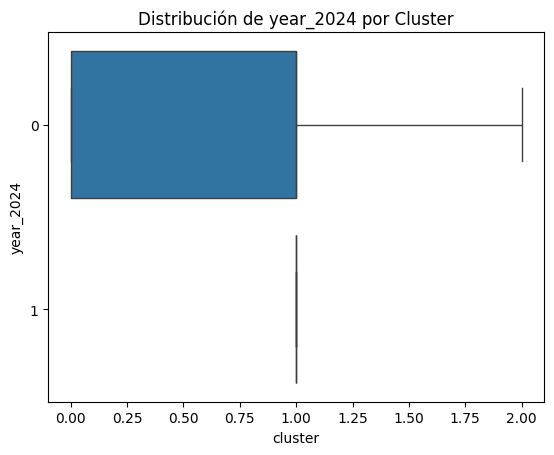

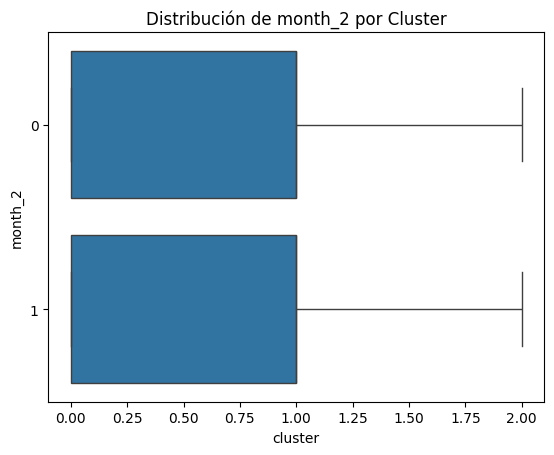

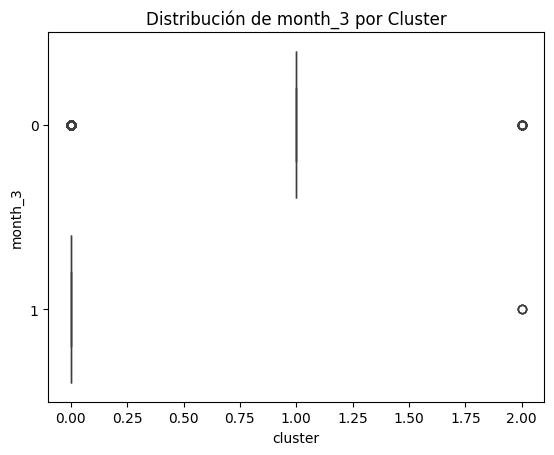

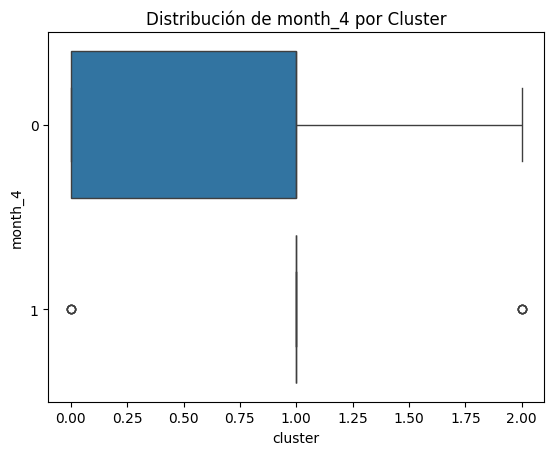

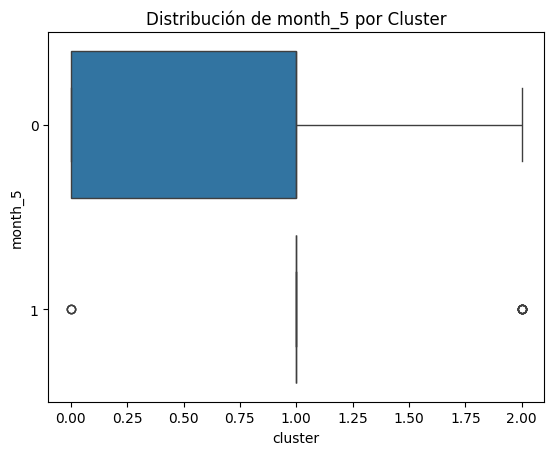

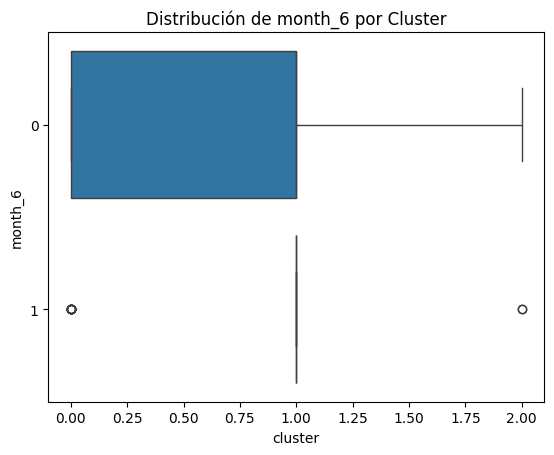

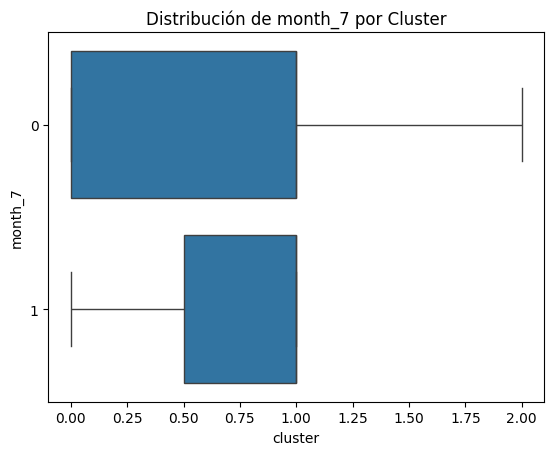

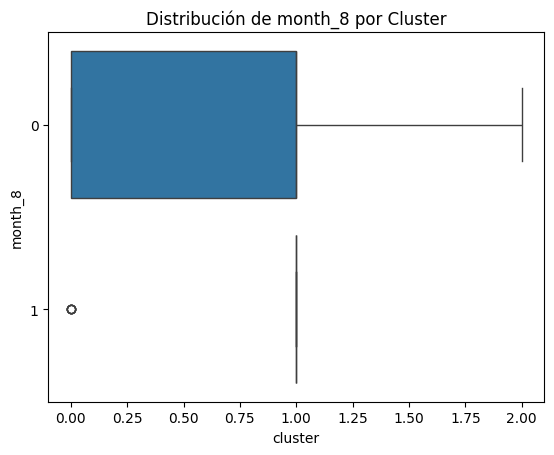

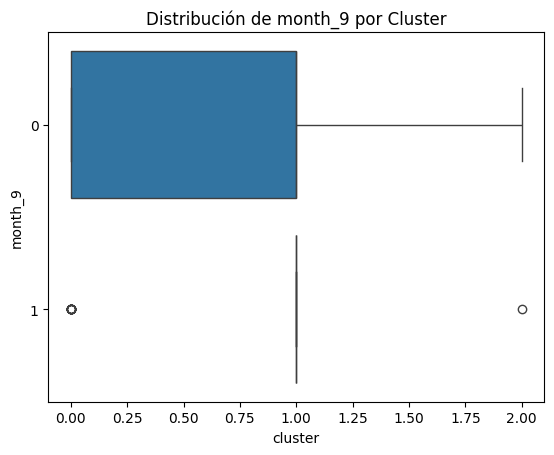

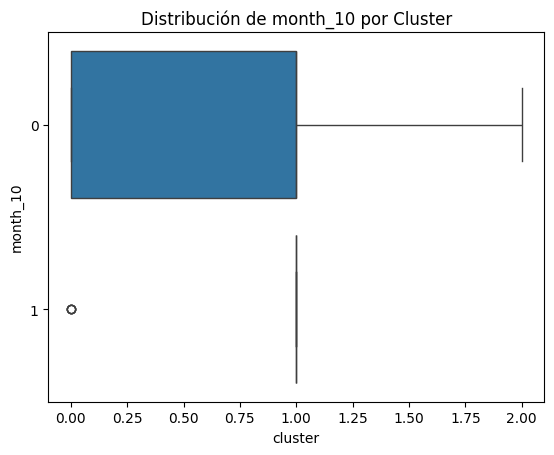

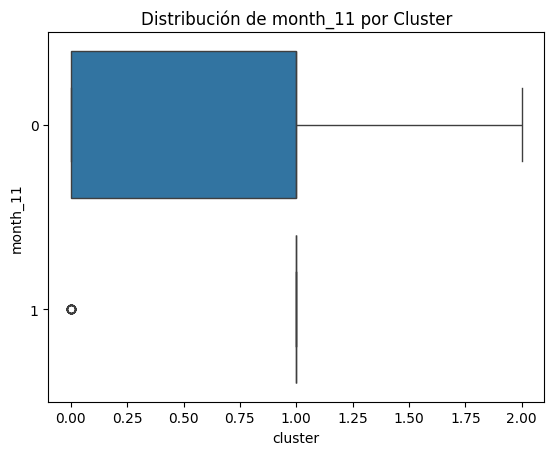

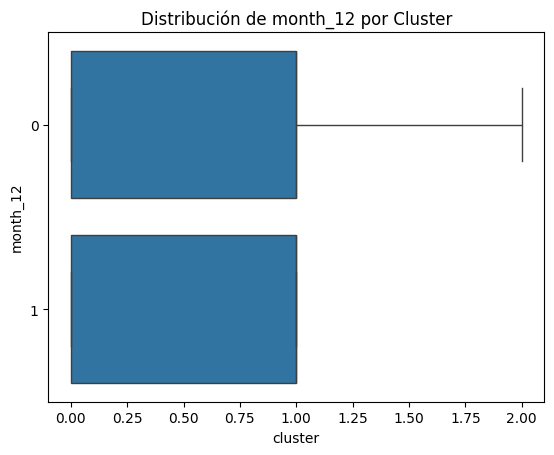

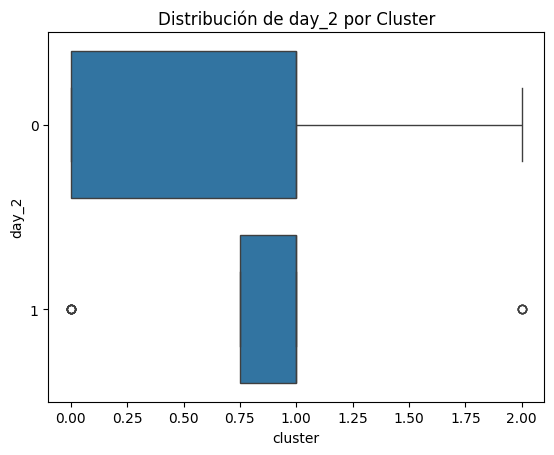

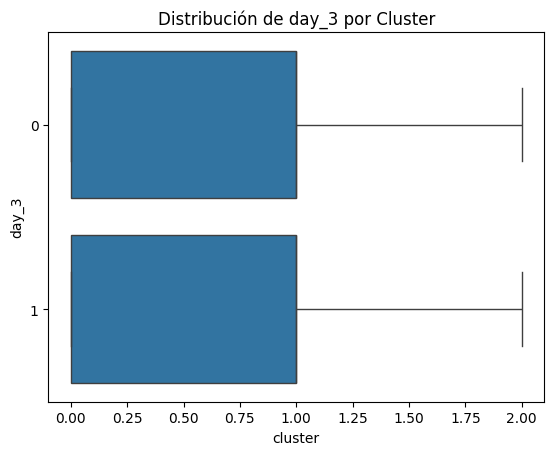

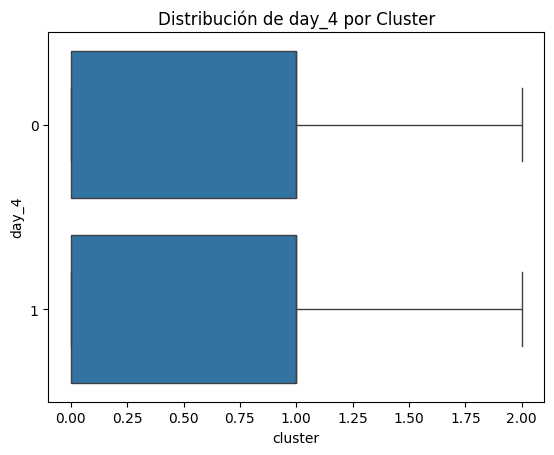

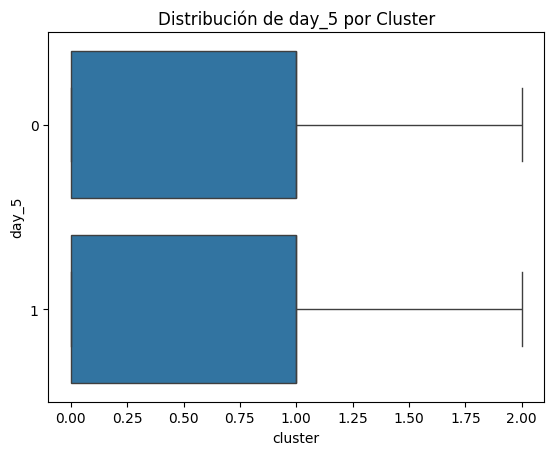

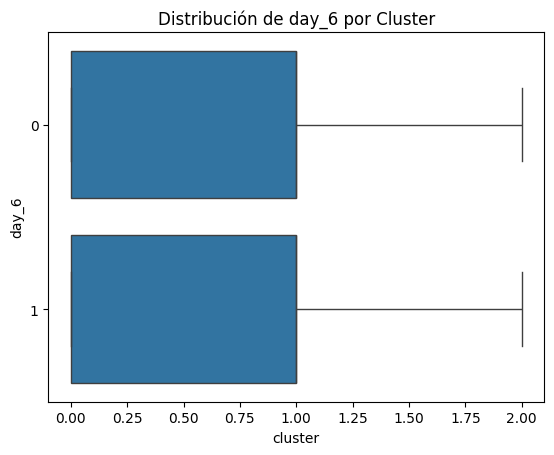

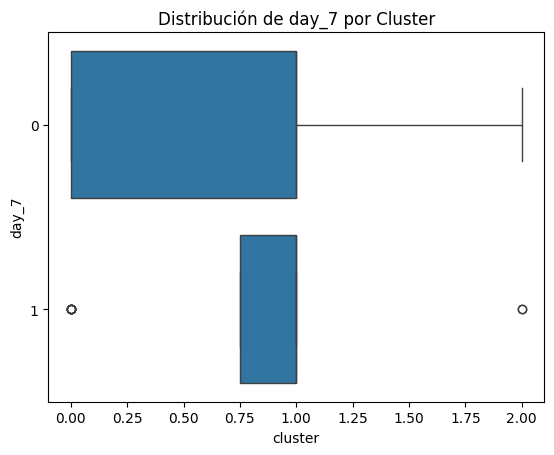

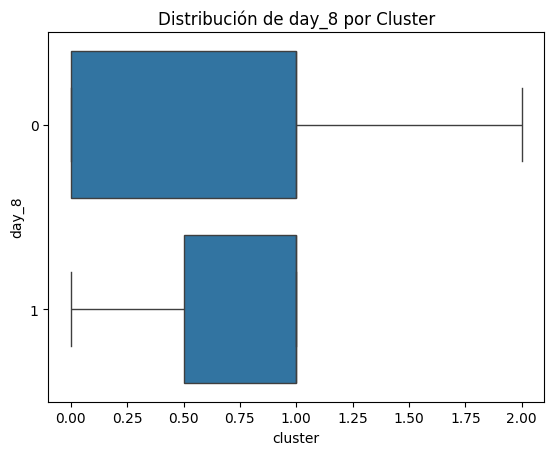

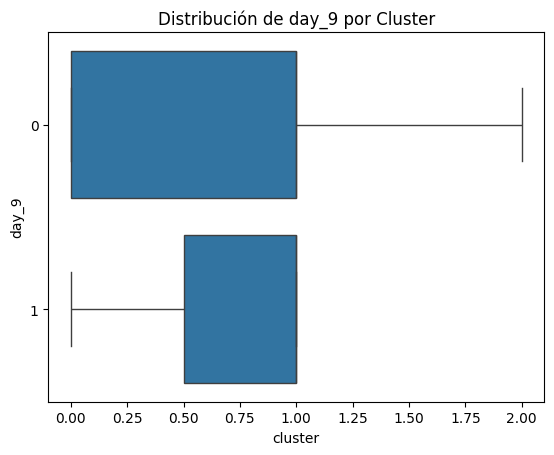

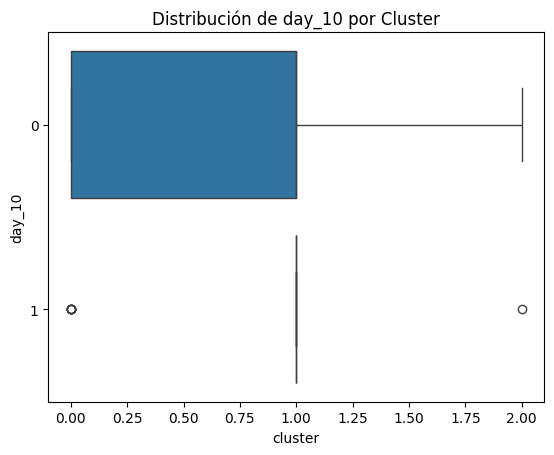

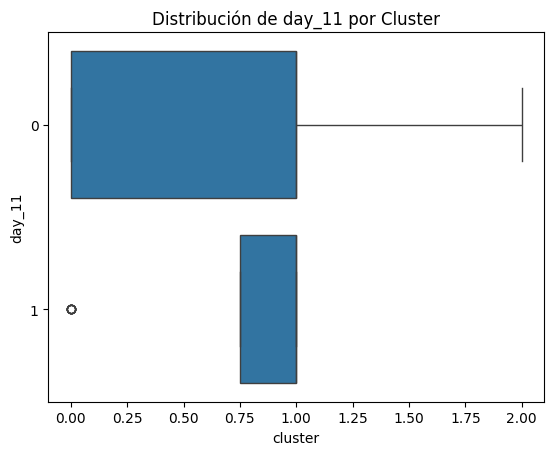

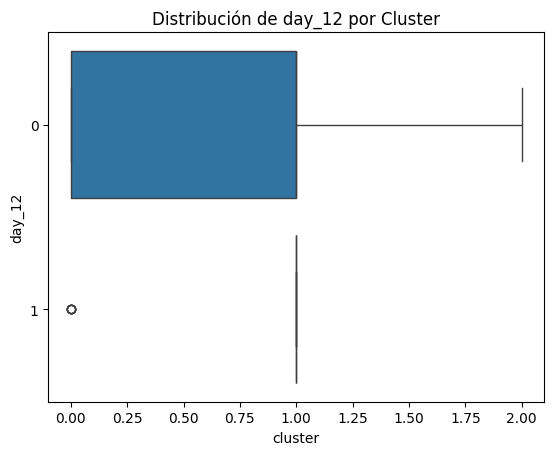

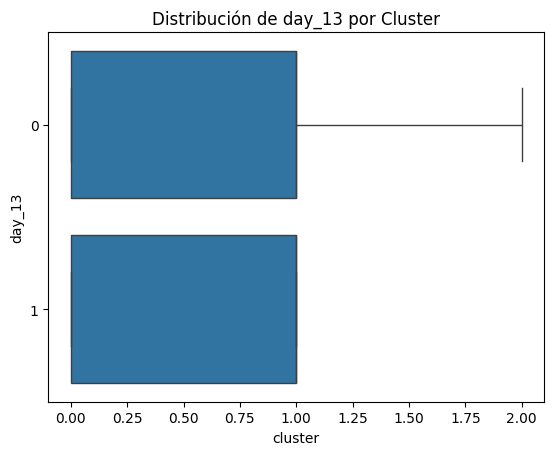

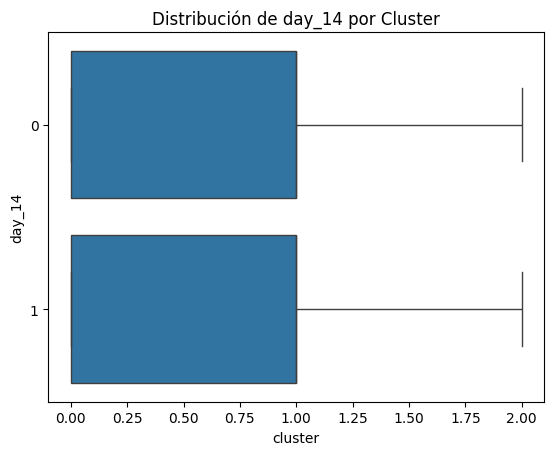

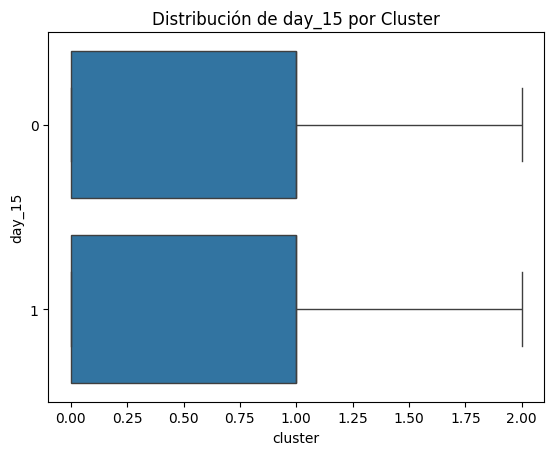

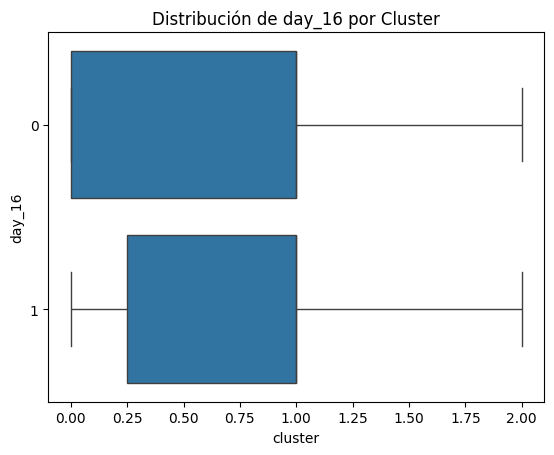

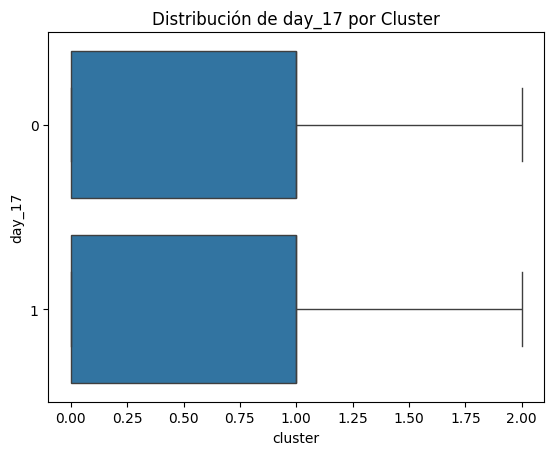

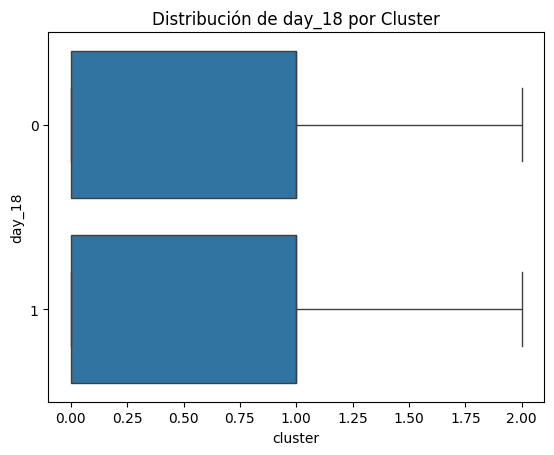

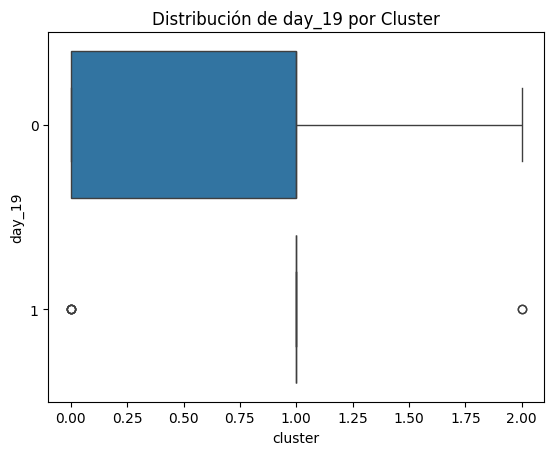

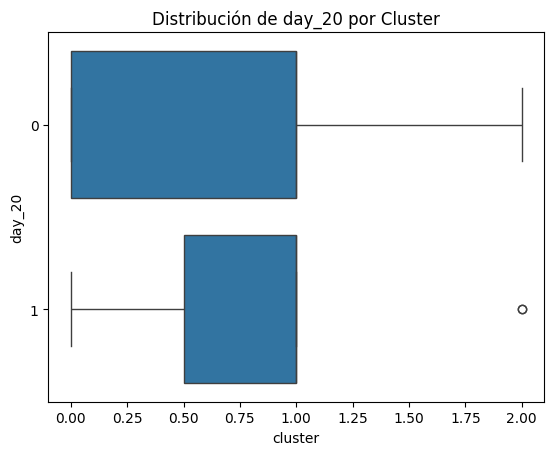

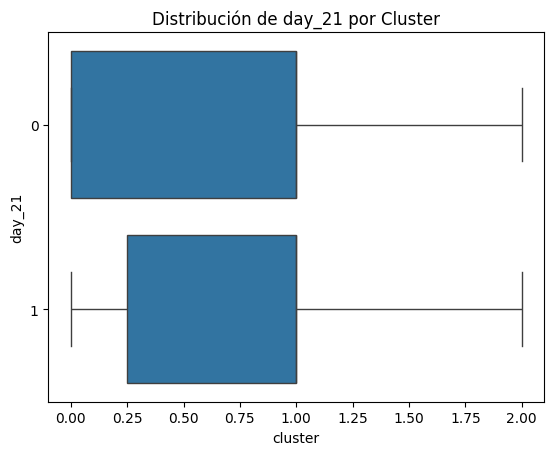

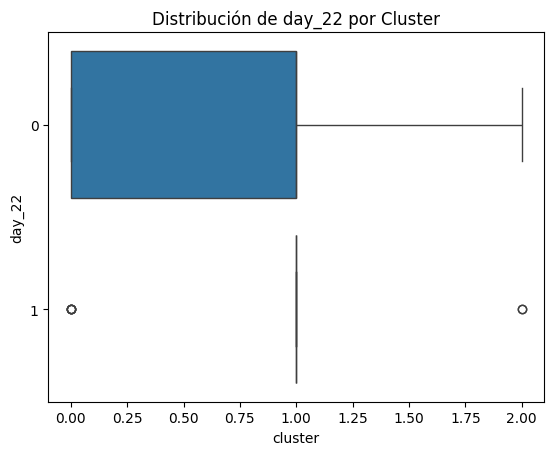

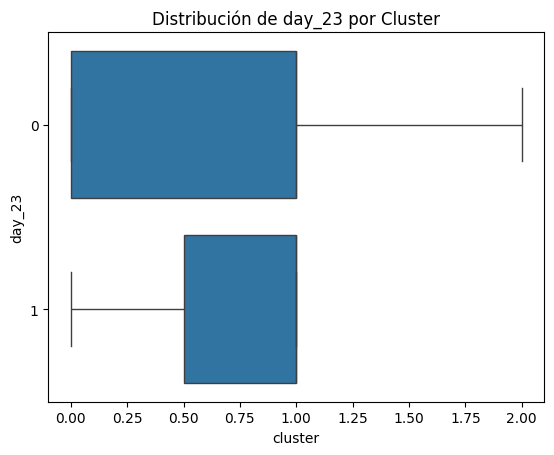

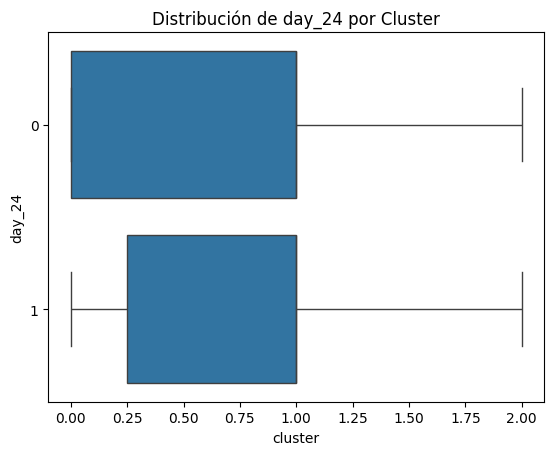

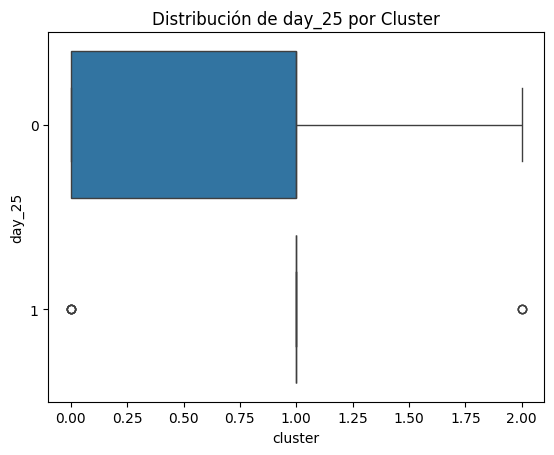

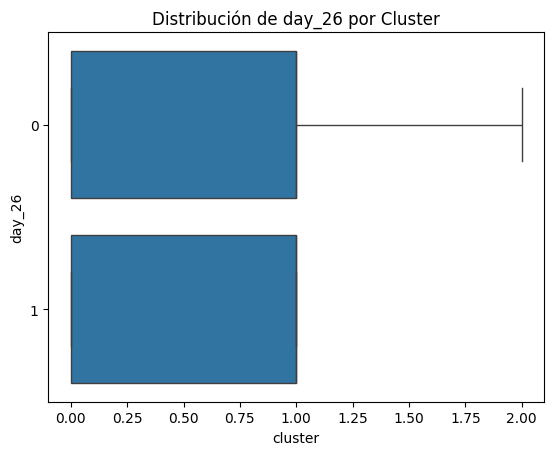

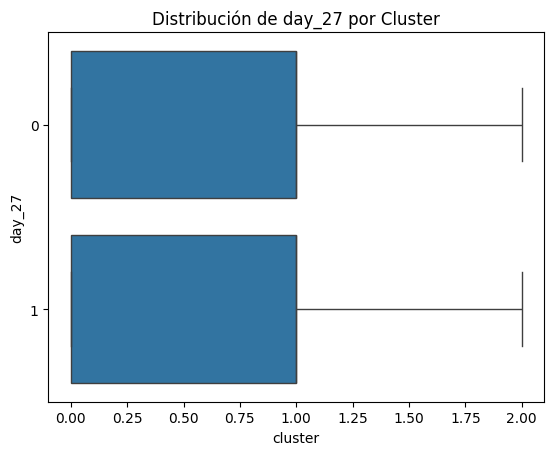

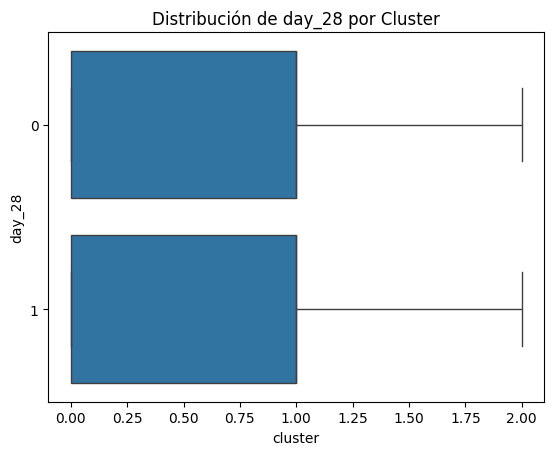

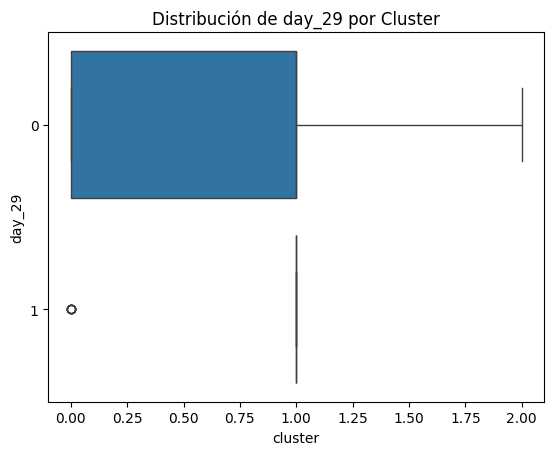

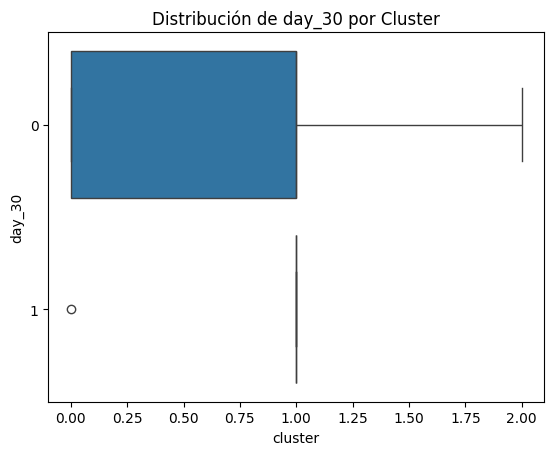

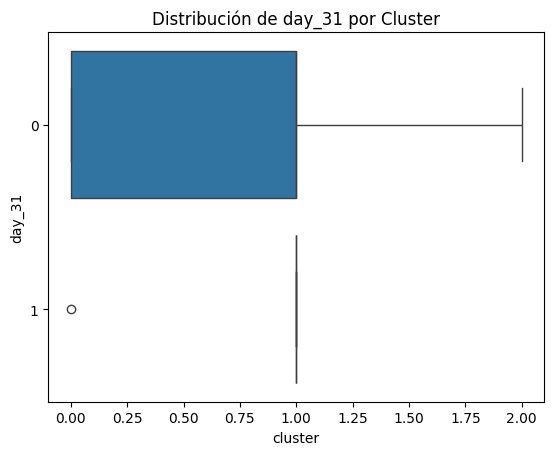

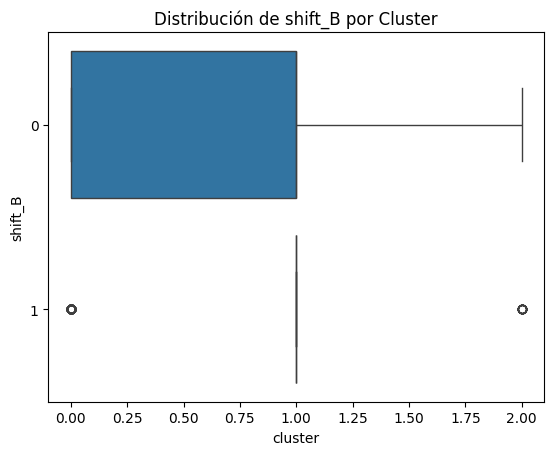

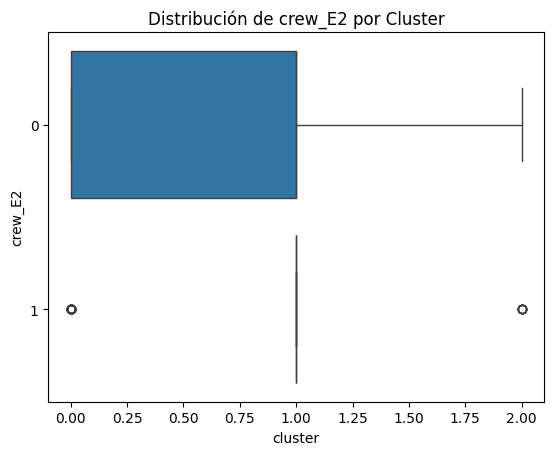

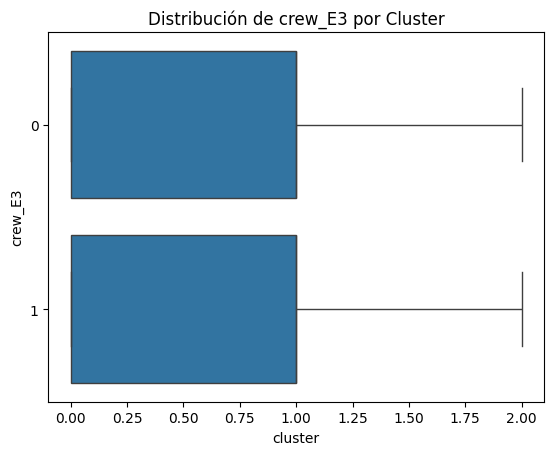

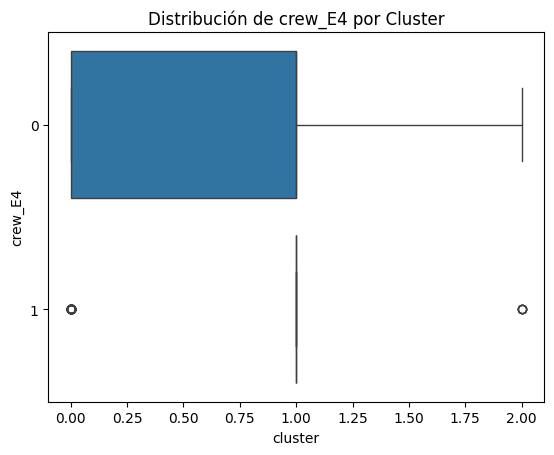

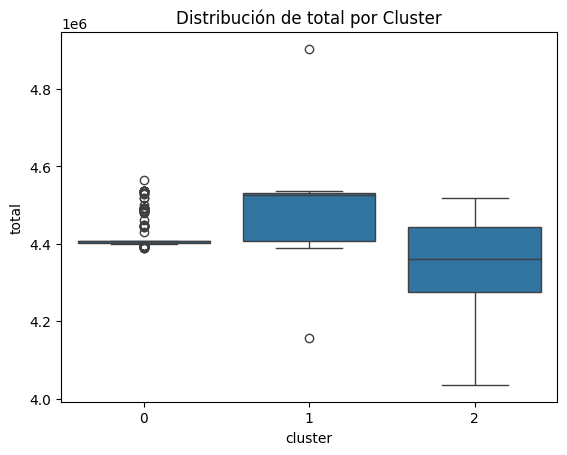

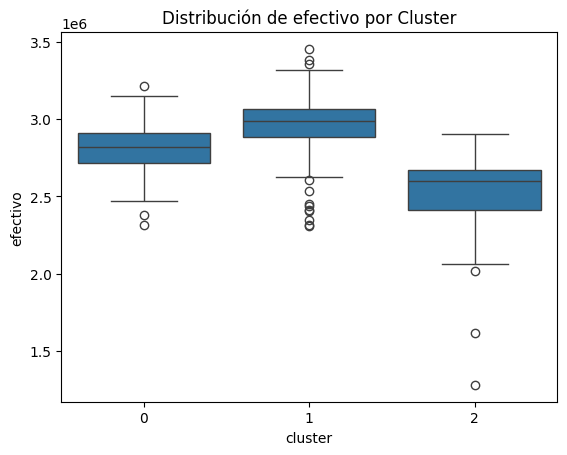

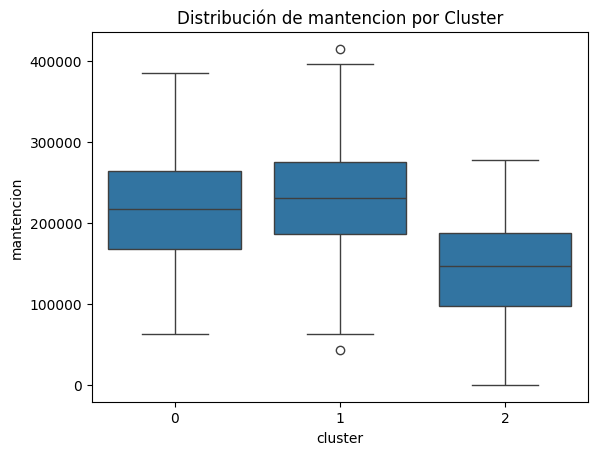

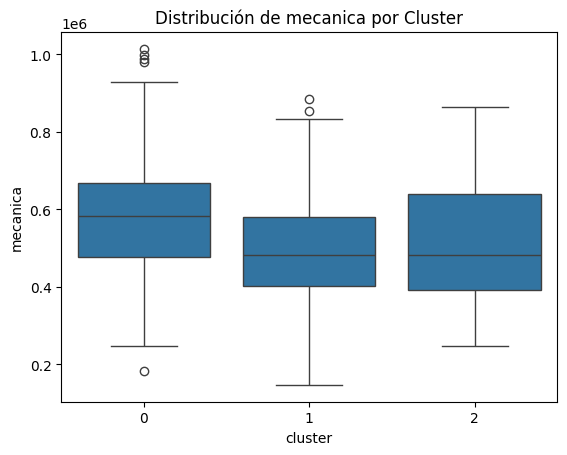

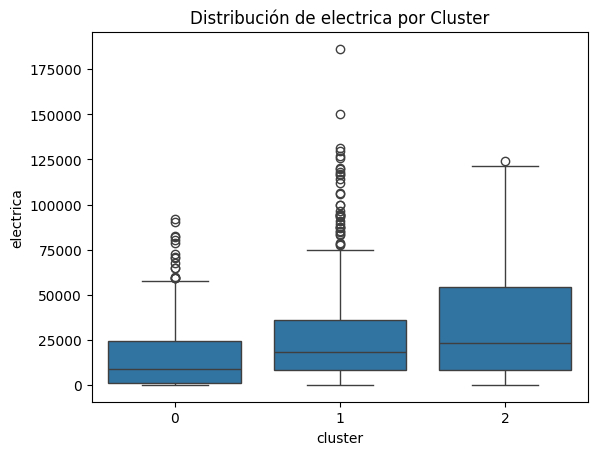

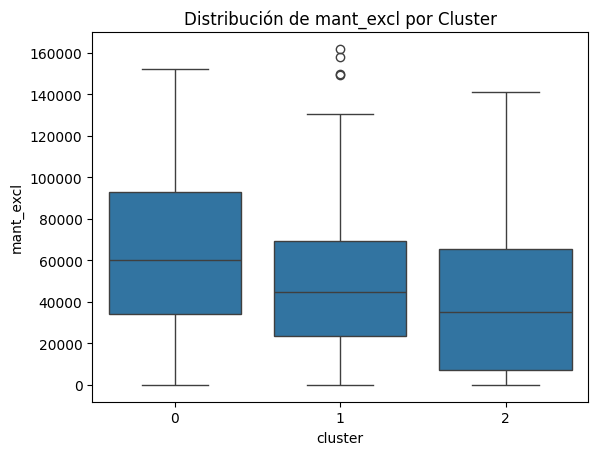

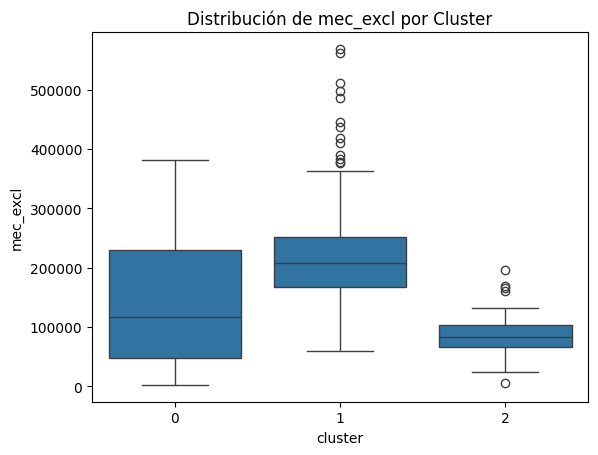

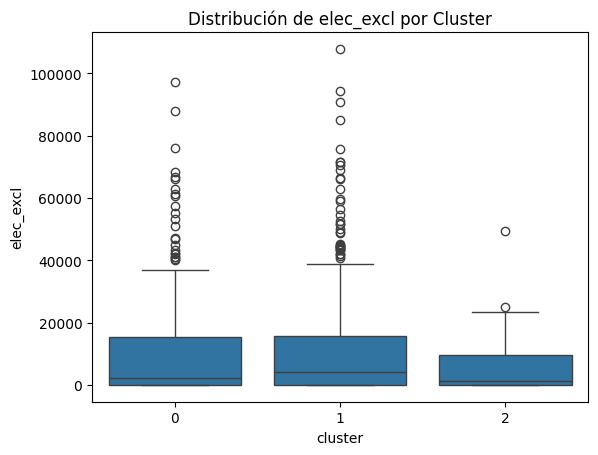

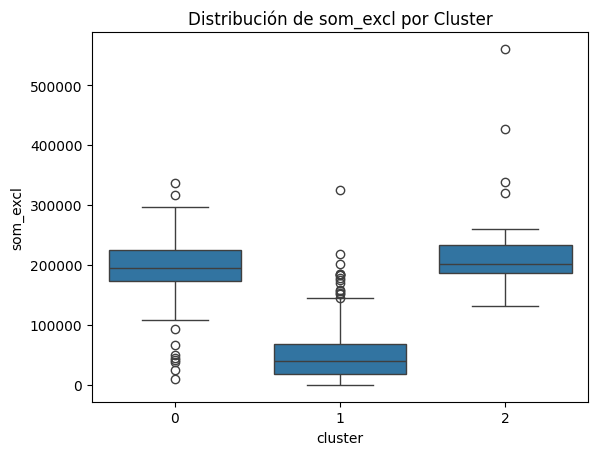

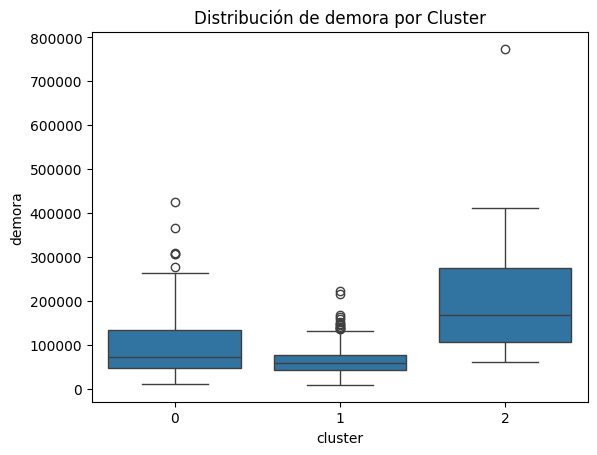

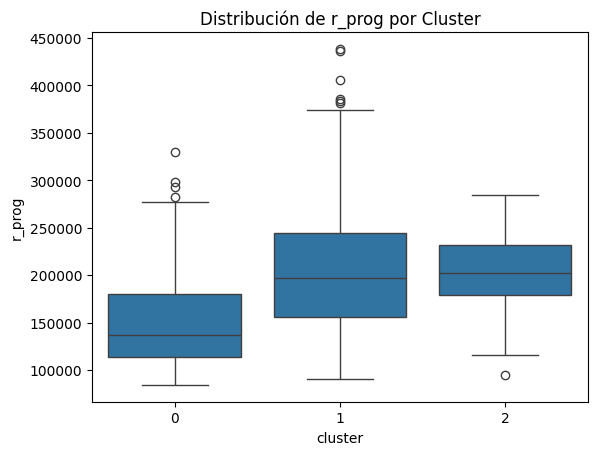

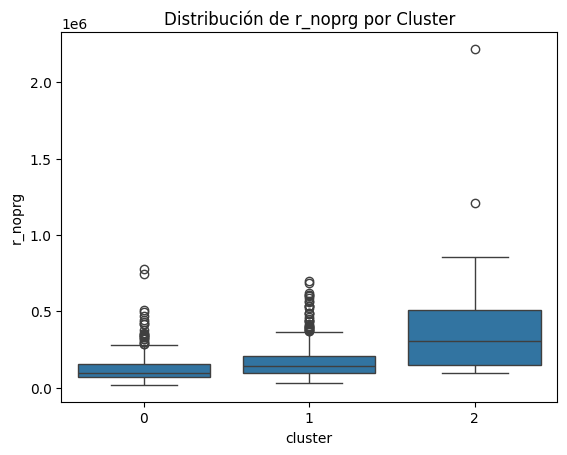

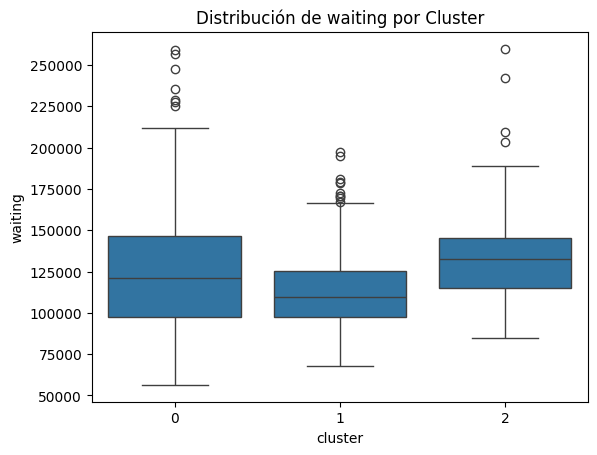

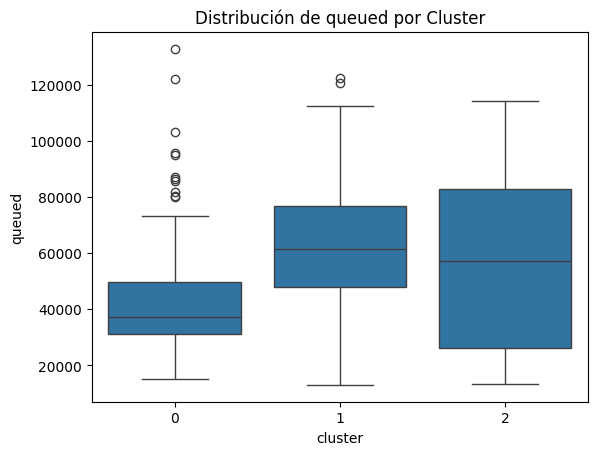

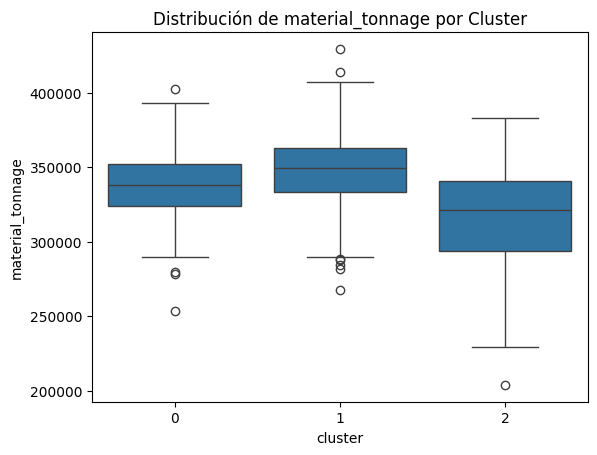

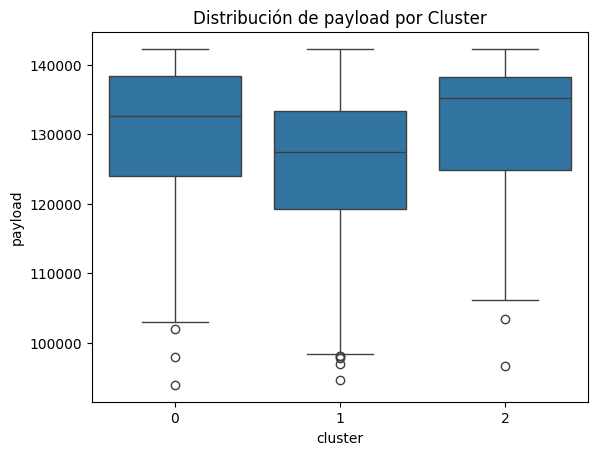

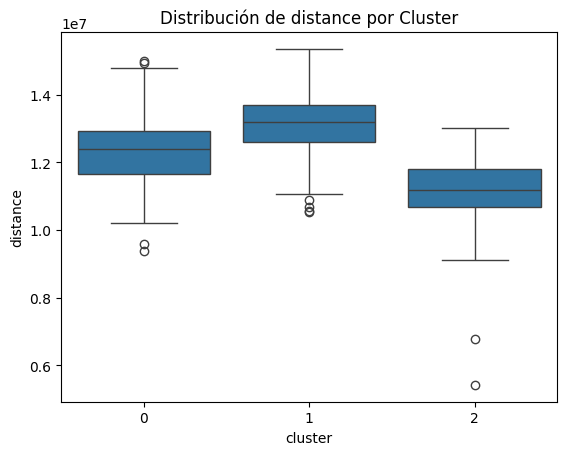

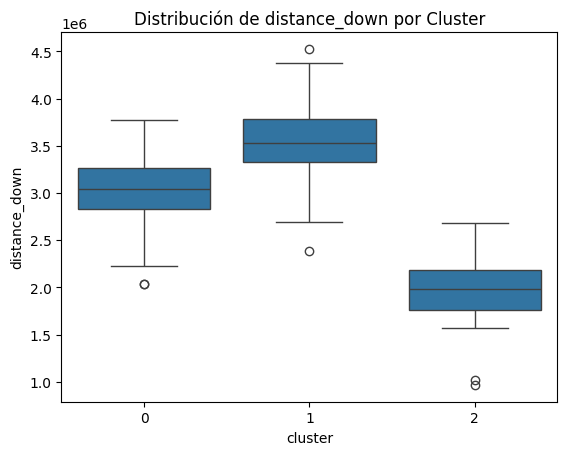

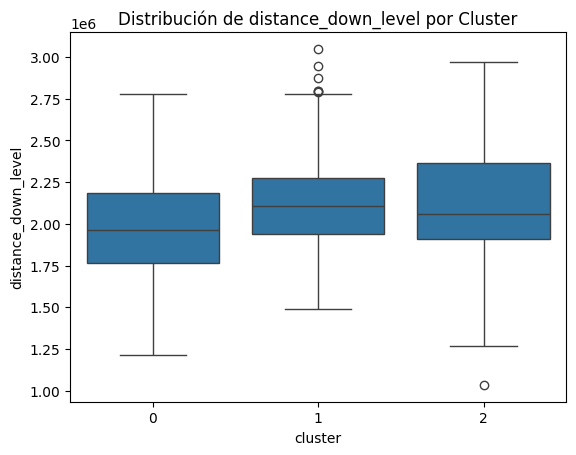

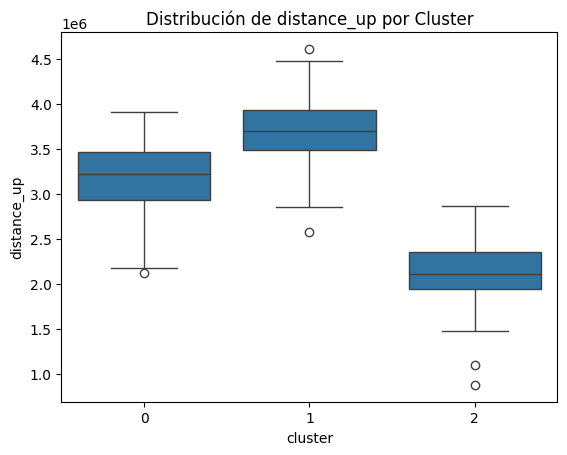

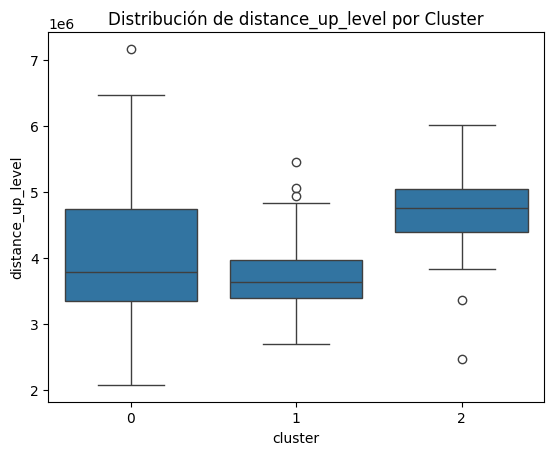

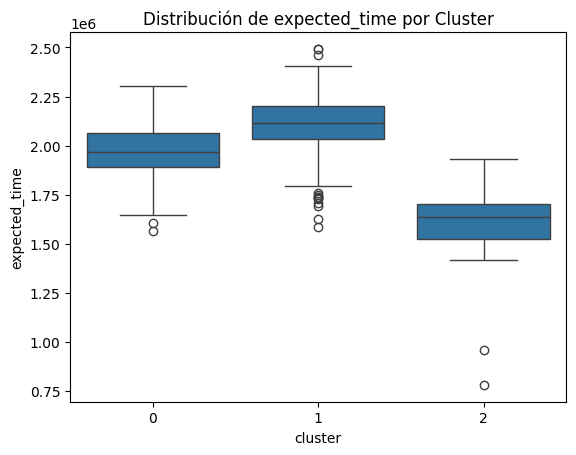

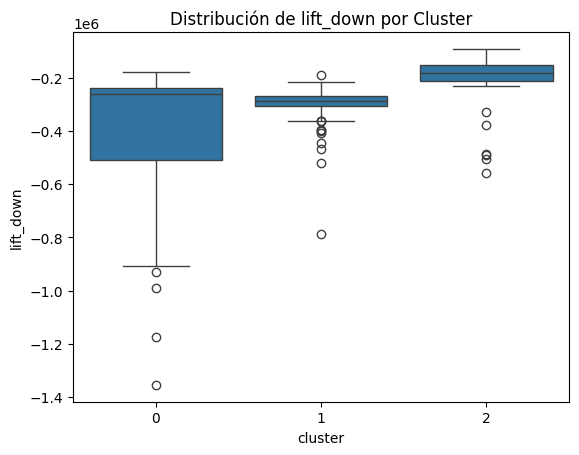

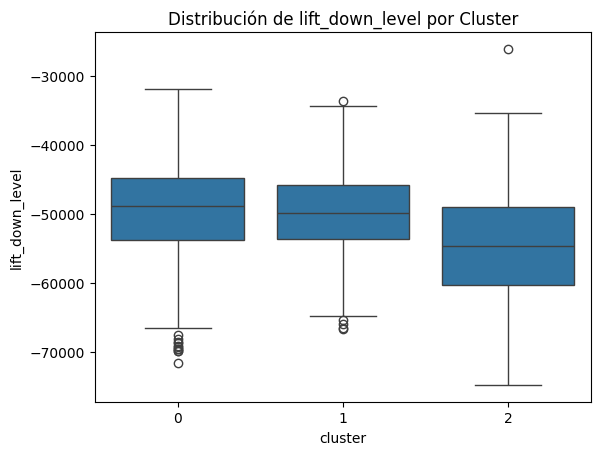

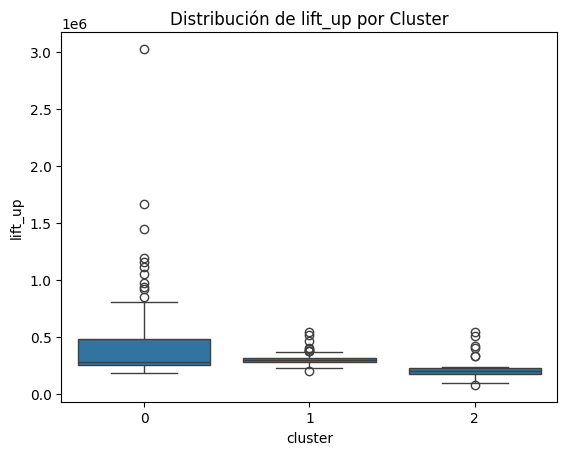

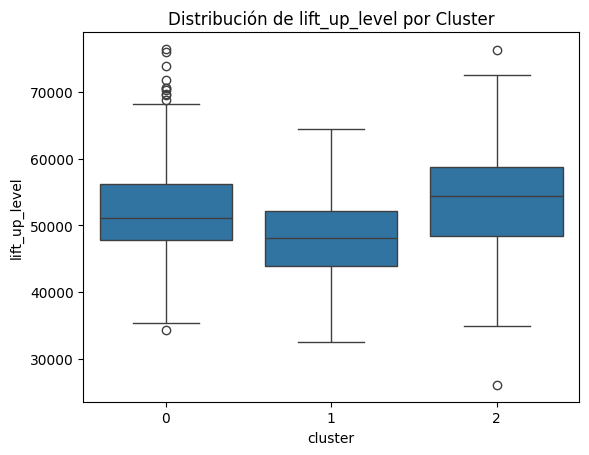

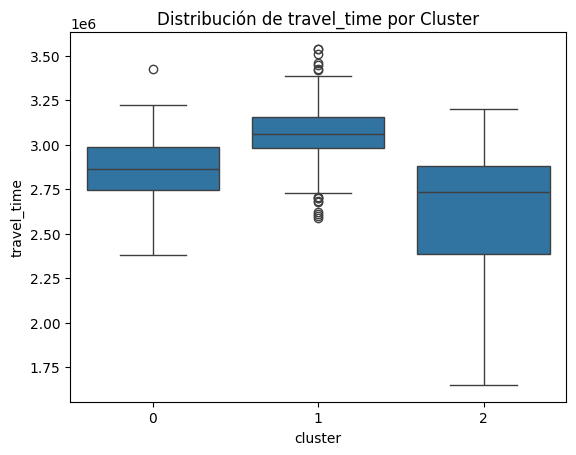

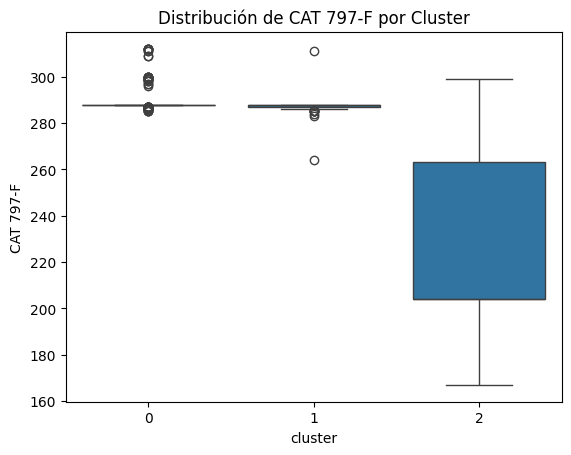

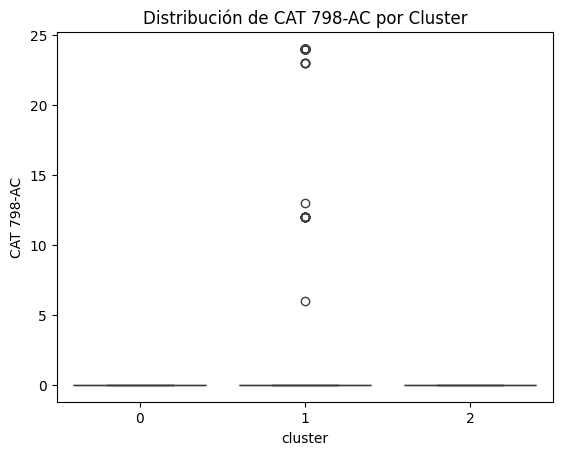

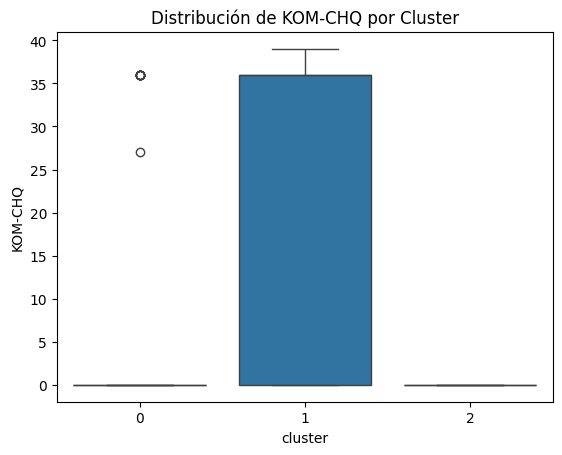

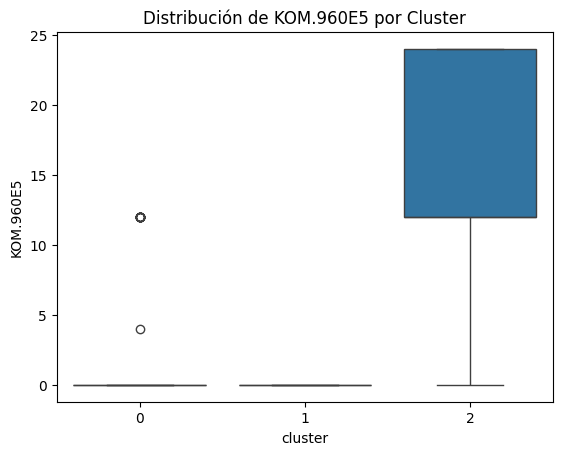

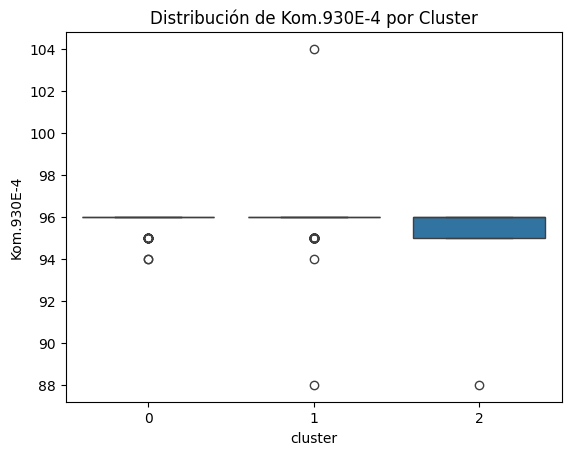

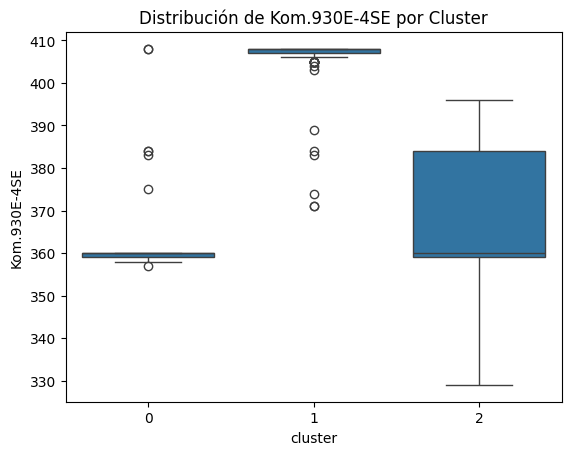

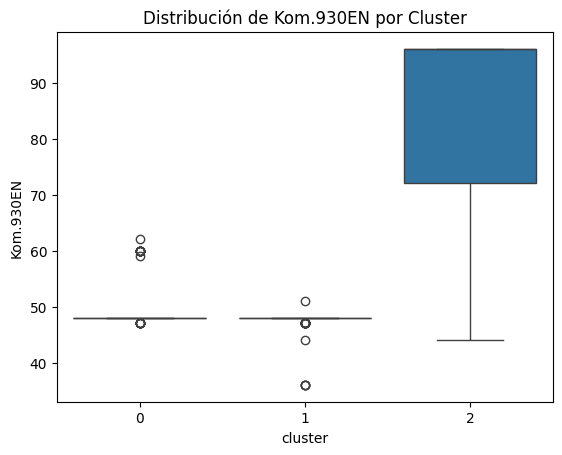

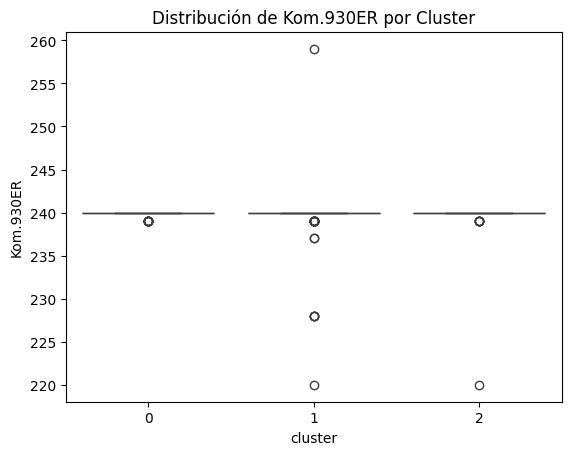

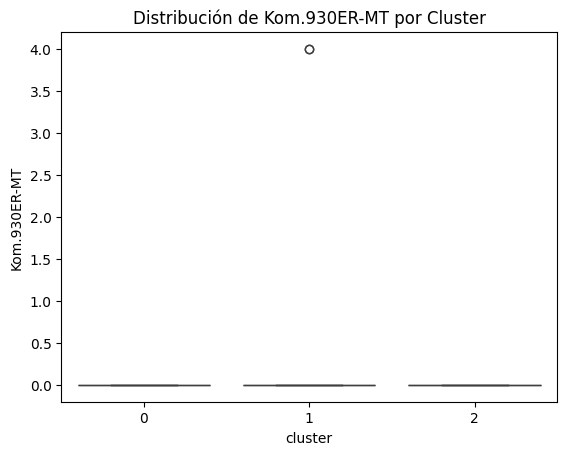

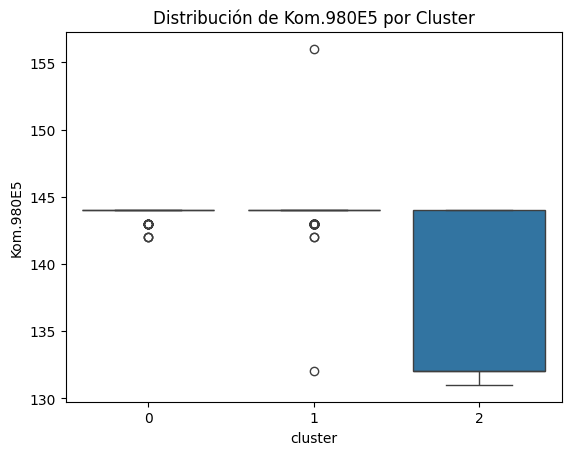

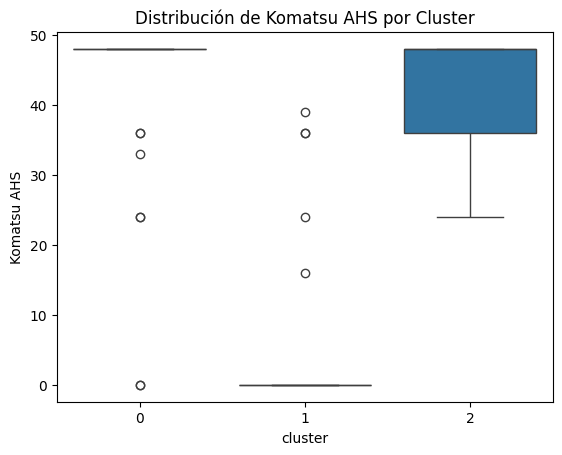

In [45]:
for feature in df_bajo_media.columns[:-1]:  # Excluye la columna 'cluster'
    sns.boxplot(x='cluster', y=feature, data=df_bajo_media)
    plt.title(f"Distribución de {feature} por Cluster")
    plt.show()
